In [70]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from astropy.stats import sigma_clipped_stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
!pip install tensorflow
!pip install keras
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [129]:
df_org=pd.read_csv("/content/drive/MyDrive/DSE302 DSML/ver2/exoplanet_trn_data.csv")
target_df=pd.read_csv("/content/drive/MyDrive/DSE302 DSML/ver2/final_target_variables.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,33,34,81,82,106,107,153,154,155,170,172,204,280,281) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [130]:
df_org['pl_orbsmax']=target_df['pl_orbsmax']

df_org.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,st_nspec,pl_nespec,pl_ntranspec,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,pl_orbsmax
0,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.1101
1,Kepler-1476 b,Kepler-1476,b,NaN,NaN,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0932
2,Kepler-255 d,Kepler-255,d,NaN,NaN,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0202
3,Kepler-82 e,Kepler-82,e,NaN,NaN,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0632
4,K2-156 b,K2-156,b,NaN,NaN,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0149


In [131]:
len(df_org['pl_orbsmax'])

17969

Analysis using selected features as discused in the report:

In [133]:
usecols=[0, 1, 31, 38, 46, 54, 62, 70, 79, 83, 87, 91, 95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183]
df2 = df_org.iloc[: , [1,31, 38, 46, 54, 62, 70,  79, 83, 87, 91,95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183,207,204,191,187,167,149,145,141,133,129,125,74,66,58,50,42]].copy()


In [7]:
df2.head()

,hostname,pl_orbper,pl_rade,pl_masse,pl_msinie,pl_cmasse,pl_bmasse,pl_bmassprov,pl_dens,pl_orbeccen,...,pl_trueobliq,pl_projobliq,pl_orblper,pl_orbtper,pl_occdep,pl_bmassj,pl_cmassj,pl_msinij,pl_massj,pl_radj
0,AU Mic,18.859019,3.24,13.6,NaN,NaN,13.6,Mass,2.3,0.0,...,NaN,NaN,NaN,NaN,NaN,0.04279,NaN,NaN,0.04279,0.289
1,Kepler-1476,10.35863224,1.80,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kepler-255,1.04562266,1.37,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kepler-82,5.90224692,2.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K2-156,0.81314,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103


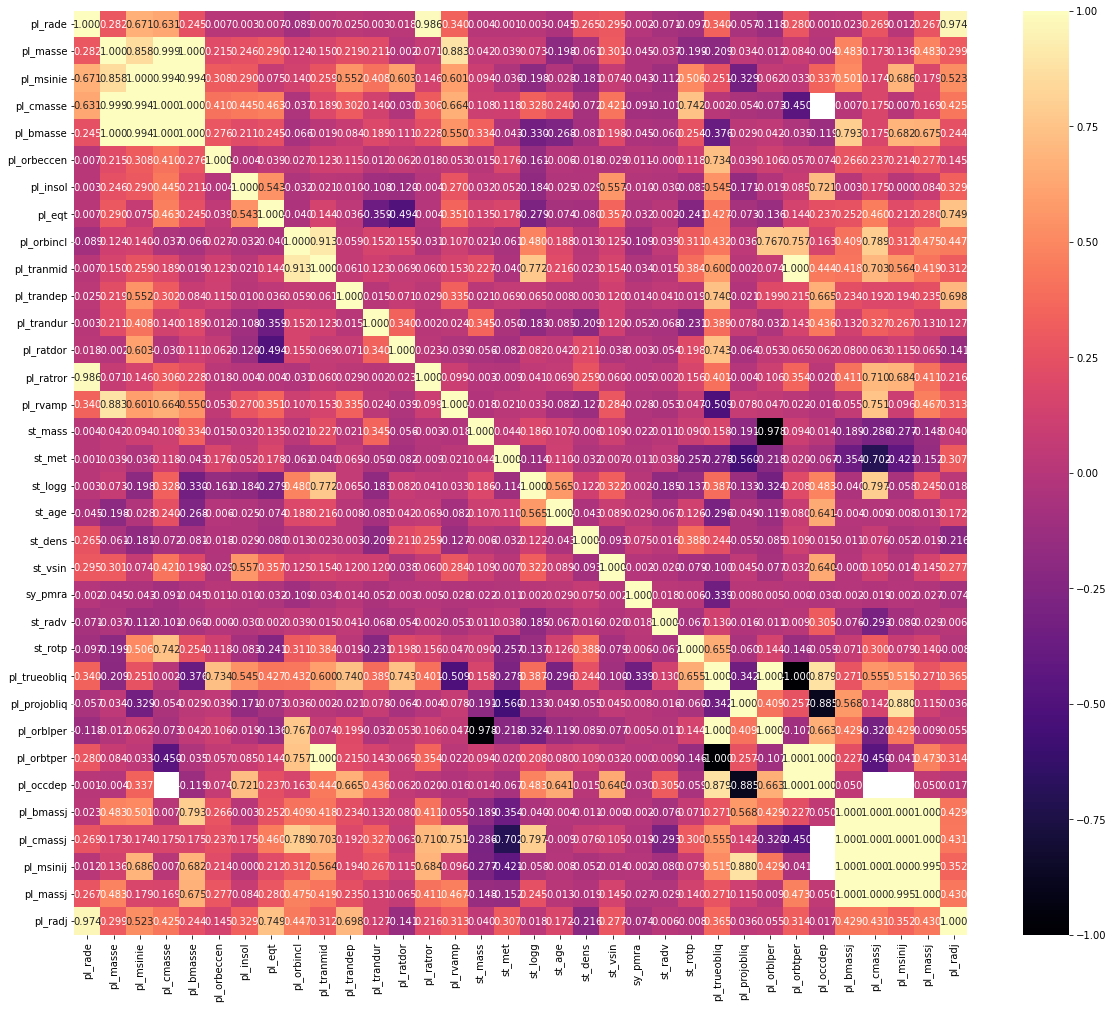

In [8]:
plt.figure(figsize=(20, 17))
sns.heatmap(df2.corr(),annot=True,cmap = 'magma',fmt='.3f')
plt.show()

In [134]:
k=0

a=[31, 38, 46, 54, 62, 70, 78, 79, 83, 87, 91,95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183,207,204,191,187,167,149,145,141,133,129,125,74,66,58,50,42]
for i in range(0,len(a),1):
  cnt=0
  for row in df_org.iloc[:,a[i]]:
      try:
          float(row)
          pass
      except ValueError:
          k=k+1
          df_org.iloc[[cnt], [a[i]]]=np.nan
      except NameError:
          k=k+1
          df_org.iloc[cnt, a[i]]=np.nan
      row=str(row)        
      cnt+=1
print(k)


9960


In [135]:
median_com=[]

for i in range(0,len(a),1):
  b=[]
  b=np.array(df_org.iloc[:,a[i]],dtype=float)
  median_com.append(np.nanmedian(b))
median_com

[11.4634736,
 2.17,
 178.30263,
 323.8618,
 0.030594999999999997,
 287.97699,
 0.0,
 0.91,
 0.0,
 79.1,
 777.0,
 89.01,
 2454975.20251,
 0.2867,
 0.04792,
 3.4026,
 19.687,
 0.02155,
 41.9,
 5663.0,
 0.9,
 0.92,
 -0.01,
 4.45,
 0.7,
 1.6435,
 0.0,
 -0.0702997,
 13.3096555,
 -0.02,
 22.2,
 0.0,
 0.0,
 20.0,
 0.0,
 114.9,
 2453932.2,
 0.0,
 0.82,
 0.4495,
 1.108,
 0.6185,
 0.235]

In [136]:
for i in range(0,len(a),1):
  df_org.iloc[:,a[i]].fillna(value=median_com[i],inplace=True)

In [137]:
dfuseful=df_org.iloc[:,[31, 38, 46, 54, 62, 70, 79, 83, 87, 91,95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183,207,204,191,187,167,145,141,133,129,125,74,66,58,50,42]]

In [138]:
#Splitting the training and testing data
X_train,X_test,y_train,y_test =train_test_split(dfuseful, df_org['pl_orbsmax'],test_size=0.4,random_state=1)
regressor = LinearRegression()

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
ytr=np.array(y_train)
yt=ytr.reshape(-1,1)
y = sc_y.fit_transform(yt)

# Fitting the training datasets
regressor.fit(X, y)

# Printing the fitted parameters
print('Coefficients: \n\n',regressor.coef_)
print('\n Intercept:\n\n',regressor.intercept_)

# Prediction using the testing dataset
y_pred= regressor.predict(X_test)
print('\n', 'Predicted values: \n\n', y_pred)

Coefficients: 

 [[ 1.06391328e-02  1.91991236e-02  1.14788187e-01 -1.52734983e-01
   9.91786411e-03  1.87166055e-01 -5.09764406e-02  1.76332531e-03
  -1.62020056e-02  4.75165851e-02  3.89472495e-03 -4.90413806e-04
  -1.01394050e-02 -5.51616538e-03  8.36366950e-03  1.48087931e-02
  -9.13677158e-03 -8.77210624e-02 -2.40750379e-02  1.49722020e-02
  -1.54489386e-03  9.01110177e-03  2.48313783e-02 -1.16117486e-03
  -2.56387752e-03 -9.21751137e-03 -8.68400773e-03  1.38211940e-02
   6.77572203e-02 -2.01167133e-03 -2.27238324e-02  4.01751762e-03
   3.59233388e-03  5.00899287e-03 -3.28641905e-04  3.14009793e-03
  -3.24477078e-01 -1.23402452e-01  5.30752375e-01  1.33262727e-01
  -1.11691047e-02]]

 Intercept:

 [3.46787426e-17]

 Predicted values: 

 [[-2072.72708179]
 [-2089.55498342]
 [-2036.10641787]
 ...
 [-2106.46244279]
 [-2071.58436968]
 [-2082.23085009]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [123]:
score=regressor.score(X,y)
score

0.08568402472451886

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
regressor.predict(X_test)
regressor.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


-0.0006899238369761918

In [16]:
import sklearn.preprocessing
minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = minmax_scaler.fit_transform(dfuseful)

In [17]:
X_train,X_test,y_train,y_test =train_test_split(data_scaled, df_org['pl_orbsmax'],test_size=0.4,random_state=1)
regressor = LinearRegression()
# Fitting the training datasets
regressor.fit(X_train, y_train)
score_scaled=regressor.score(X_test,y_test)
score_scaled

-123.53465103796898

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor()
dtregressor.fit(X, y)

y_pred = dtregressor.predict(X_test)

#mse = mean_squared_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2,mse)

-0.0007441253934261649 10378.342036130252


In [19]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X, y)
test_pred_rf = np.array(rf.predict(X_test))
print(test_pred_rf)
y_test = np.array(y_test)
print(y_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.02283449 0.03893977 0.03644661 ... 0.03893929 0.03893649 0.02283449]
[0.1606  0.0846  0.03106 ... 0.142   0.0435  0.0906 ]


In [20]:
print('r2 score :', r2_score(test_pred_rf,y_test))

r2 score : -224391995.05102217


In [21]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
test_pred_rfns = np.array(rf.predict(X_test))
print(test_pred_rfns)
y_test = np.array(y_test)
print(y_test)


[0.1586747  0.0832681  0.05344815 ... 0.1034365  0.04402357 0.08885682]
[0.1606  0.0846  0.03106 ... 0.142   0.0435  0.0906 ]


In [22]:
print('r2 score :', r2_score(test_pred_rfns,y_test))

r2 score : -11.742738375511848


Removing the Outliers

In [139]:
mean = np.mean(df_org['pl_orbsmax'])
std = np.std(df_org['pl_orbsmax'])
print(mean, std)

outliers = np.where((df_org['pl_orbsmax'] > (mean + 3*std)) | (df_org['pl_orbsmax'] < (mean - 3*std)))
print(outliers)


1.6065577026456683 80.22706672420223
(array([  314,  2666,  2751,  2800,  2962,  3286,  3812,  4815,  5770,
        6265,  6620,  9024, 11528, 12284, 12862, 13685, 13753, 14346,
       14919, 15129, 15317, 15448, 16173, 16828]),)


In [140]:
outlier=[314,  2666,  2751,  2800,  2962,  3286,  3812,  4815,  5770,
        6265,  6620,  9024, 11528, 12284, 12862, 13685, 13753, 14346,
       14919, 15129, 15317, 15448, 16173, 16828]
dfuseful.drop(dfuseful.index[outlier], axis=0, inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
df_org.drop(outlier, axis=0, inplace=True)
mean = np.mean(df_org['pl_orbsmax'])
std = np.std(df_org['pl_orbsmax'])
print(mean, std)

0.42073755134243757 5.0278069580364475


#Iterated Target Variable Discretization
Iteration 0

In [26]:
def divider(col,no_of_classes):
  classes=np.linspace(np.min(col),np.max(col),no_of_classes)
  n=len(col)
  cl=np.zeros(len(classes))
  class_tv=[]
  index_com=[]
  labels=np.zeros(len(col))
  for h in range(0,len(classes)):
    
    temp = []
    index=[]
    for i in range(n):
      if classes[h]<col[i]<classes[h+1]:
        labels[i]=h
        index.append(i)
        temp.append(float(col[i]))
    cl[h]=np.median(temp)
    class_tv.append(temp)
    index_com.append(index)
  return class_tv,labels,index_com

In [142]:
label_arr=divider(np.array(df_org['pl_orbsmax']),20)[1]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [143]:
df_org['discrete_label']=label_arr

In [144]:
#Splitting the training and testing data
X_train,X_test,y_train,y_test =train_test_split(dfuseful,df_org['discrete_label'] ,test_size=0.4,random_state=1)
from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(max_depth =3, criterion='entropy',random_state = 42)
dt0.fit(X_train, y_train)
y_pred=dt0.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         8.0       1.00      0.80      0.89         5
         9.0       1.00      1.00      1.00      7166
        10.0       0.83      1.00      0.91         5
        11.0       0.00      0.00      0.00         0
        12.0       1.00      1.00      1.00         1
        13.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0

    accuracy                           1.00      7178
   macro avg       0.43      0.42      0.42      7178
weighted avg       1.00      1.00      1.00      7178



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.06213429924770131
-3.460223694696306


Iteration 1

In [33]:
class9=divider(np.array(df_org['pl_orbsmax']),20)[0][9]
index9=divider(np.array(df_org['pl_orbsmax']),20)[2][9] 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
for i in range (10):
  print(i,len(divider(np.array(class9),20)[2][i]))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0 3
1 16714
2 592
3 296
4 142
5 76
6 31
7 8
8 8
9 5


In [171]:
label_arr9=divider(np.array(class9),10)[1] 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [169]:
df_org1=pd.DataFrame()
dfuseful1=pd.DataFrame()
#for i in range(len(index)):
#  dfuseful1 = pd.concat([dfuseful1,dfuseful.loc[index[i],:]])

dfuseful1 = dfuseful.iloc[index9,:]

In [170]:
dfuseful1

,pl_orbper,pl_rade,pl_masse,pl_msinie,pl_cmasse,pl_bmasse,pl_dens,pl_orbeccen,pl_insol,pl_eqt,...,pl_trueobliq,pl_projobliq,pl_orblper,pl_orbtper,pl_occdep,pl_bmassj,pl_cmassj,pl_msinij,pl_massj,pl_radj
0,18.859019,3.24,13.60000,323.8618,0.030595,13.60000,2.3,0.000,79.10,454.0,...,20.0,0.0,114.9,2453932.2,0.0,0.04279,0.4495,1.108,0.04279,0.289
1,10.35863224,1.80,178.30263,323.8618,0.030595,287.97699,0.91,0.000,129.28,860.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
2,1.04562266,1.37,178.30263,323.8618,0.030595,287.97699,0.91,0.000,1659.82,1628.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
3,5.90224692,2.55,178.30263,323.8618,0.030595,287.97699,0.91,0.000,209.32,970.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
4,0.81314,1.15,178.30263,323.8618,0.030595,287.97699,0.91,0.000,79.10,1347.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,36.27594657,3.50,178.30263,323.8618,0.030595,287.97699,0.91,0.000,13.12,485.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
17965,5.9123,3.60,479.90000,323.8618,0.030595,479.90000,0.91,0.000,79.10,777.0,...,20.0,0.0,114.9,2453932.2,0.0,1.51000,0.4495,1.108,1.51000,0.321
17966,11.463474,2.17,178.30263,323.8618,0.030595,287.97699,0.91,0.000,79.10,777.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
17967,20.8133,2.17,178.30263,54.6640,0.030595,54.66400,0.91,0.121,79.10,777.0,...,20.0,0.0,279.0,2450942.2,0.0,0.17200,0.4495,0.172,0.61850,0.235


In [172]:
df_org1['discrete_label2']=label_arr9

In [173]:
#Splitting the training and testing data
X_train,X_test,y_train,y_test =train_test_split(dfuseful1,df_org1['discrete_label2'] ,test_size=0.4,random_state=1)
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth =3, criterion='entropy',random_state = 42)
dt1.fit(X_train, y_train)
y_pred=dt1.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6812
         1.0       0.74      0.93      0.83       261
         2.0       0.70      0.69      0.70        81
         3.0       0.00      0.00      0.00         0
         4.0       0.60      0.50      0.55         6
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0

    accuracy                           0.98      7160
   macro avg       0.34      0.35      0.34      7160
weighted avg       0.98      0.98      0.98      7160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.0717877094972067
0.21297665537319066


Iteration 3

In [42]:
for i in range (10):
  print(i,len(divider(np.array(class9),20)[2][i]))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0 3
1 16714
2 592
3 296
4 142
5 76
6 31
7 8
8 8
9 5


In [48]:
class9_1=divider(np.array(class9),20)[0][1]
index9_1=divider(np.array(class9),20)[2][1]
label_arr9_1=divider(np.array(class9_1),10)[1] 
df_org2=pd.DataFrame()
dfuseful2=pd.DataFrame()
dfuseful2 = dfuseful1.iloc[index9_1,:]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [51]:
df_org2['discrete_label3']=label_arr9_1

In [88]:
#Splitting the training and testing data
X_train,X_test,y_train,y_test =train_test_split(dfuseful2,df_org2['discrete_label3'] ,test_size=0.4,random_state=1)
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth =3, criterion='entropy',random_state = 42)
dt2.fit(X_train, y_train)
y_pred=dt2.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.92      0.98      0.95      2611
         3.0       0.96      0.91      0.94      2874
         4.0       0.94      0.89      0.91       720
         5.0       0.90      0.84      0.87       248
         6.0       0.85      0.49      0.62       233
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0

    accuracy                           0.92      6686
   macro avg       0.51      0.46      0.48      6686
weighted avg       0.94      0.92      0.93      6686



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred,y_test, squared=False))
print(r2_score(y_pred,y_test))

0.3930673534667463
0.8372599865446753


# Using our model on the test data.


In [146]:
df_orgtest=pd.read_csv("/content/drive/MyDrive/DSE302 DSML/ver2/exoplanet_tst_data.csv")

In [147]:
k=0

a=[31, 38, 46, 54, 62, 70,79, 83, 87, 91,95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183,207,204,191,187,167,145,141,133,129,125,74,66,58,50,42]
for i in range(0,len(a),1):
  cnt=0
  for row in df_orgtest.iloc[:,a[i]]:
      try:
          float(row)
          pass
      except ValueError:
          k=k+1
          df_orgtest.iloc[[cnt], [a[i]]]=np.nan
      except NameError:
          k=k+1
          df_orgtest.iloc[cnt, a[i]]=np.nan
      row=str(row)        
      cnt+=1
print(k)

367


In [148]:
median_com=[]

for i in range(0,len(a),1):
  b=[]
  b=np.array(df_orgtest.iloc[:,a[i]],dtype=float)
  median_com.append(np.nanmedian(b))
median_com

[11.46347165,
 2.19,
 174.0084,
 297.16956,
 11.283,
 280.00237,
 0.79,
 0.0,
 77.36,
 773.0,
 89.015,
 2454974.99379,
 0.3083,
 0.04917,
 3.4527,
 19.85,
 0.02182,
 37.3,
 5669.5,
 0.91,
 0.92,
 -0.02,
 4.45,
 1.0,
 1.5487,
 0.0,
 -0.0934294,
 13.419514,
 0.01,
 24.195,
 -0.04,
 34.8,
 0.0,
 103.0,
 2453360.5555,
 0.0,
 0.761,
 1.381865,
 1.089,
 0.66,
 0.238]

In [149]:
for i in range(0,len(a),1):
  df_orgtest.iloc[:,a[i]].fillna(value=median_com[i],inplace=True)

In [151]:
dfusefultest=df_orgtest.iloc[:,[31, 38, 46, 54, 62, 70, 79, 83, 87, 91,95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183,207,204,191,187,167,145,141,133,129,125,74,66,58,50,42]]

In [166]:
y_pred1=dt0.predict(dfusefultest)
label_arrtest=divider(np.array(y_pred1),20)[1]


for i in range (10):
  print(i,len(divider(label_arrtest,20)[2][i]))

class8=divider(np.array(label_arrtest),20)[0][8]
index8=divider(np.array(label_arrtest),20)[2][8]
label_arr8=divider(np.array(class8),10)[1] 

df_orgtest1=pd.DataFrame()
dfusefultest1=pd.DataFrame()


dfusefultest1 = dfusefultest.iloc[index8,:]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 1994
9 0


In [176]:
df_orgtest1['discrete_label2']=label_arr8
y_pred2=dt1.predict(dfusefultest1)
y_pred2

array([1., 0., 0., ..., 0., 0., 0.])